In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

In [2]:
# !pip install --upgrade pythainlp
# !pip install pyLDAvis

In [3]:
import pythainlp
import gensim
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings


In [4]:
df = pd.read_csv("sentimentMacbookAirM1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  81 non-null     object
dtypes: object(1)
memory usage: 776.0+ bytes


In [5]:
df = df.astype(str)
df

,message
0,มาคอนเฟิร์ม?อีกเสียงว่า Macbook?air? m1? ลื่นไ...
1,สอบถามได้มั้ยคะว่ากะจะซื้อ mac air m1 ไว้ทำงาน...
2,ผมยังใช้ M1 อยู่ถ้าไม่ได้ตัดต่อระดับเทพๆๆๆ ยัง...
3,ถ้าไม่นับเล่นเกมนะครับ นี่คือโน๊ตบุ๊คที่ดีที่ส...
4,จุดเด่นอีกอย่างคือ เสียงลำโพงมันดีมาก
...,...
76,ขออนุญาตสอบถามหน่อยนะคะ คือเราซื้อ macbook pro...
77,อยากสอบถามทุกคนหน่อยค่ะ ว่า apple care+ ควรซื้...
78,ตั้งแต่เราซื้อผลิตภัณฑ์แอปเปิ้ลมาลังเลตลอดว่าจ...
79,มันก็ออกมาเรื่อยทุกปีแหละครับ ดูการใช้งานและปร...


# Tokenize word

In [6]:
stop_word = list(pythainlp.corpus.thai_stopwords())
rm_word = [ ' ','    ','\n', '(', ')', '?', '+', 'ผม', ':', 'ตัว', 'เรื่อง', 'ส่วนตัว', 'คับ', '--', '//', 'แน่นอน', 'สอย', 'ซื้อ', 'เวลา', '' ]
screenword = stop_word + rm_word

def tokenize_n_space(sentence):
    merged = ''
    words = pythainlp.word_tokenize( str(sentence), engine = 'newmm' )
    for i in words :
        if i not in screenword :
            merged = merged + ',' + i
    return merged[1:]

In [7]:
df['tokenized'] = df['message'].apply(lambda x: tokenize_n_space(x))
df

,message,tokenized
0,มาคอนเฟิร์ม?อีกเสียงว่า Macbook?air? m1? ลื่นไ...,"คอนเฟิร์ม,เสียง,Macbook,air,m,1,ลื่นไหล,แบต,อึ..."
1,สอบถามได้มั้ยคะว่ากะจะซื้อ mac air m1 ไว้ทำงาน...,"สอบถาม,กะ,mac,air,m,1,ทำงาน,ตัดต่อ,กราฟิก,phot..."
2,ผมยังใช้ M1 อยู่ถ้าไม่ได้ตัดต่อระดับเทพๆๆๆ ยัง...,"M,1,ตัดต่อ,ระดับ,เทพ,ๆๆๆ,โปรแกรม,พัดลม"
3,ถ้าไม่นับเล่นเกมนะครับ นี่คือโน๊ตบุ๊คที่ดีที่ส...,"เล่น,เกม,โน๊ตบุ๊ค,ดี,โลก,ราคา,28000,ทำได้,ประส..."
4,จุดเด่นอีกอย่างคือ เสียงลำโพงมันดีมาก,"จุดเด่น,เสียง,ลำโพง,ดีมาก"
...,...,...
76,ขออนุญาตสอบถามหน่อยนะคะ คือเราซื้อ macbook pro...,"ขออนุญาต,สอบถาม,นะคะ,macbook,pro,14,”,m,1,pro,..."
77,อยากสอบถามทุกคนหน่อยค่ะ ว่า apple care+ ควรซื้...,"สอบถาม,apple,care,เครื่อง,icare,ต่างกัน, ,กลัว..."
78,ตั้งแต่เราซื้อผลิตภัณฑ์แอปเปิ้ลมาลังเลตลอดว่าจ...,"ผลิตภัณฑ์,แอปเปิ้ล,ลังเล,บ้าน,apple,ประกัน,ตอน..."
79,มันก็ออกมาเรื่อยทุกปีแหละครับ ดูการใช้งานและปร...,"ออกมา,ทุกปี,ดู,การใช้งาน,ประโยชน์,ที่จะ,คน,รอ,..."


# Creating Dictionary

In [8]:
doc = df['tokenized'].to_list()
texts = [ [i for i in dc.split(',')] for dc in doc ]

dictionary = gensim.corpora.Dictionary(texts)

print(dictionary.token2id.keys())

dict_keys(['1', 'Macbook', 'Performance', 'Windows', 'air', 'drop', 'm', 'คอนเฟิร์ม', 'ลืม', 'ลื่นไหล', 'สักพัก', 'อึด', 'เสียง', 'แบต', 'illustrator', 'mac', 'photoshop', 'กราฟิก', 'กะ', 'ตัดต่อ', 'ทำงาน', 'น้อง', 'สอบถาม', 'ไหว', 'M', 'พัดลม', 'ระดับ', 'เทพ', 'โปรแกรม', 'ๆๆๆ', '28000', 'การใช้งาน', 'ดี', 'ต่อให้', 'ทำ', 'ทำได้', 'ประสบการณ์', 'ราคา', 'ห่า', 'เกม', 'เล่น', 'โน๊ตบุ๊ค', 'โลก', 'จุดเด่น', 'ดีมาก', 'ลำโพง', '7', 'CTW', 'geniusbar', 'studio', 'ขาย', 'คนอื่น', 'คอม', 'จี', 'ดีกว่า', 'ดู', 'ที้ง', 'นิดนึง', 'บริการ', 'พนักงาน', 'ระบาย', 'รุ', 'ร้าน', 'สอง', 'สัก', 'สาขา', 'ห่วย', 'เข้าไป', 'เจอ', 'เนาะ', 'เนียส', 'แย่', 'แอปเปิ้ล', 'ใช้งาน', '2013', '2020', '2023', '34', '900', 'Air', 'คน', 'ค่ำ', 'งานเอกสาร', 'ตอน', 'ต้นปี', 'ประชุม', 'ประทับใจ', 'ปี', 'มีปัญหา', 'ยัน', 'รุ่น', 'หาย', 'เก่า', 'เครื่อง', 'เดิม', 'เปิดตัว', 'เลือก', 'แชร์', 'แต่เช้า', 'ไว', '/', '4', 'adobe', 'apple', 'exel', 'premia', 'word', 'การตัดต่อ', 'ขั้นพื้นฐาน', 'ความแตกต่าง', 'ค่', 'ง', 'จ่าย', 'ดร'

In [9]:
gensim_corpus = [ dictionary.doc2bow(tx, allow_update = True) for tx in texts ]
word_frq = [ [ (dictionary[ides], frq) for ides, frq in coup ] for coup in gensim_corpus ]

# Topic Modeling

In [10]:
num_topic = 30
chunksize = 4000 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 50
eval_number = 1 # more number, more compute time spending

# Make index to word dictionary
temp = dictionary[0]
id2word = dictionary.id2token

%time
model = gensim.models.LdaModel( corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, alpha='auto', eta='auto'
                               , iterations=iterations, num_topics=num_topic, passes=passes, eval_every=eval_number )

Wall time: 0 ns


In [11]:
pyLDAvis.gensim.prepare( model, gensim_corpus, dictionary )

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
5      0.105536 -0.026003       1        1  8.831574
2      0.067491  0.202398       2        1  6.838789
12    -0.017004  0.011486       3        1  6.683686
19    -0.070937 -0.088168       4        1  5.496832
15     0.097123  0.036500       5        1  5.420940
27     0.091229 -0.031944       6        1  5.418992
21    -0.188663 -0.014376       7        1  4.786735
8     -0.020320 -0.136659       8        1  4.547682
0      0.115472 -0.047325       9        1  4.262535
6      0.075128 -0.013864      10        1  4.177120
22     0.015059  0.052797      11        1  4.099725
26    -0.029303  0.128972      12        1  3.862828
20     0.061899 -0.072805      13        1  3.783261
25     0.104418 -0.057578      14        1  3.762762
17    -0.034830  0.094073      15        1  3.761146
4     -0.058820  0.025590      16        1  3.655909
18    -0.104413 -0.077616      17        1  3.260308
10     0.068592 -0.049142      18        1  3.257979
11    -0.059711  0.018412      19        1  2.522321
16     0.063358 -0.013229      20        1  2.492394
14     0.005699  0.057701      21        1  1.229947
28     0.030618 -0.010898      22        1  1.229288
1     -0.083989  0.037316      23        1  1.200709
13    -0.026606  0.045188      24        1  1.176321
29    -0.058663 -0.054394      25        1  1.123923
23    -0.011487 -0.031073      26        1  1.043374
9     -0.034421  0.021498      27        1  1.019375
24     0.004475  0.001235      28        1  0.727031
3     -0.057001 -0.003393      29        1  0.256789
7     -0.049927 -0.004700      30        1  0.069730, topic_info=         Term       Freq      Total Category  logprob  loglift
169            14.000000  14.000000  Default  30.0000  30.0000
24          M  18.000000  18.000000  Default  29.0000  29.0000
0           1  33.000000  33.000000  Default  28.0000  28.0000
163        กก   6.000000   6.000000  Default  27.0000  27.0000
6           m  21.000000  21.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
240       ตัด   0.001523   7.319390  Topic30  -6.7675  -1.2095
612      สเปค   0.001523   3.571125  Topic30  -6.7675  -0.4918
447   การผลิต   0.001523   2.111912  Topic30  -6.7676   0.0334
531  ตัดสินใจ   0.001522   3.434175  Topic30  -6.7679  -0.4532
0           1   0.001522  33.007259  Topic30  -6.7680  -2.7161

[1454 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
169       1  0.205356      
169       2  0.205356      
169       5  0.136904      
169      11  0.410712      
818      15  0.495720      
...     ...       ...   ...
825      15  0.495720    ๆ?
741      12  0.755451  ๆตี้
29        6  0.722524   ๆๆๆ
833      18  0.778625     ”
844      14  0.762245   🥹😭 

[1248 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 13, 20, 16, 28, 22, 9, 1, 7, 23, 27, 21, 26, 18, 5, 19, 11, 12, 17, 15, 29, 2, 14, 30, 24, 10, 25, 4, 8])

- Predict topic

In [12]:
model.show_topic(1)

[('นิ้ว', 0.03976533),
 ('ข้างนอก', 0.020208485),
 ('คน', 0.020208485),
 ('อยู่ดี', 0.020208485),
 ('คาเฟ่', 0.020208485),
 ('ทำงาน', 0.020208485),
 ('พกพา', 0.020208485),
 ('เนื่อง', 0.020208485),
 ('15', 0.020208485),
 ('ดี', 0.020208485)]

In [13]:
df['topics'] = df['tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])

In [14]:
df

,message,tokenized,topics,score
0,มาคอนเฟิร์ม?อีกเสียงว่า Macbook?air? m1? ลื่นไ...,"คอนเฟิร์ม,เสียง,Macbook,air,m,1,ลื่นไหล,แบต,อึ...",20,0.959105
1,สอบถามได้มั้ยคะว่ากะจะซื้อ mac air m1 ไว้ทำงาน...,"สอบถาม,กะ,mac,air,m,1,ทำงาน,ตัดต่อ,กราฟิก,phot...",24,0.955894
2,ผมยังใช้ M1 อยู่ถ้าไม่ได้ตัดต่อระดับเทพๆๆๆ ยัง...,"M,1,ตัดต่อ,ระดับ,เทพ,ๆๆๆ,โปรแกรม,พัดลม",27,0.930692
3,ถ้าไม่นับเล่นเกมนะครับ นี่คือโน๊ตบุ๊คที่ดีที่ส...,"เล่น,เกม,โน๊ตบุ๊ค,ดี,โลก,ราคา,28000,ทำได้,ประส...",4,0.968005
4,จุดเด่นอีกอย่างคือ เสียงลำโพงมันดีมาก,"จุดเด่น,เสียง,ลำโพง,ดีมาก",3,0.870004
...,...,...,...,...
76,ขออนุญาตสอบถามหน่อยนะคะ คือเราซื้อ macbook pro...,"ขออนุญาต,สอบถาม,นะคะ,macbook,pro,14,”,m,1,pro,...",10,0.966077
77,อยากสอบถามทุกคนหน่อยค่ะ ว่า apple care+ ควรซื้...,"สอบถาม,apple,care,เครื่อง,icare,ต่างกัน, ,กลัว...",25,0.980528
78,ตั้งแต่เราซื้อผลิตภัณฑ์แอปเปิ้ลมาลังเลตลอดว่าจ...,"ผลิตภัณฑ์,แอปเปิ้ล,ลังเล,บ้าน,apple,ประกัน,ตอน...",8,0.986874
79,มันก็ออกมาเรื่อยทุกปีแหละครับ ดูการใช้งานและปร...,"ออกมา,ทุกปี,ดู,การใช้งาน,ประโยชน์,ที่จะ,คน,รอ,...",16,0.981051


In [15]:
# !pip install tensorflow_text
# !pip install umap-learn

# Document Clustering
- Alternative method

In [ ]:
# import pythainlp
# import gensim
# import pyLDAvis.gensim
# pyLDAvis.enable_notebook()

# import warnings

In [16]:
import re
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
import umap

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

from pythainlp.corpus.common import thai_words
from pythainlp.util import Trie
import collections


In [17]:
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3'

model = hub.load(module_url)

df_k = pd.read_csv("sentimentMacbookAirM1.csv")
df_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  81 non-null     object
dtypes: object(1)
memory usage: 776.0+ bytes


In [18]:
embed_cm = model(df_k['message'].values).numpy()
embed_cm

array([[-0.03456426,  0.05708109,  0.01469755, ...,  0.01186927,
        -0.01357166,  0.09678852],
       [-0.01054443,  0.03593316,  0.03521626, ..., -0.05023287,
        -0.02311422,  0.05664483],
       [ 0.04410389,  0.02387322,  0.01173277, ...,  0.00014756,
         0.08564217,  0.02562594],
       ...,
       [-0.0236195 ,  0.02566138, -0.0348949 , ..., -0.05413022,
         0.04013607,  0.03504496],
       [ 0.08128867,  0.01058034, -0.0175554 , ..., -0.07995252,
         0.08278595,  0.06422471],
       [-0.04074633,  0.07052976,  0.02234775, ...,  0.03710676,
         0.05302522, -0.03792713]], dtype=float32)

In [19]:
reducer = umap.UMAP(random_state=42, n_components=50)
umap_embed = reducer.fit_transform(embed_cm)

Text(0, 0.5, 'WCSS')

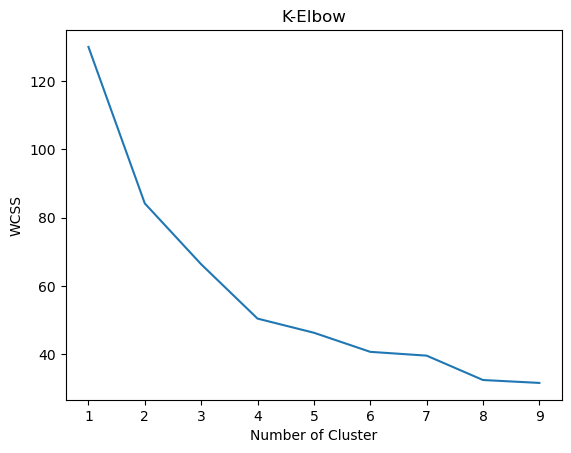

In [20]:
warnings.filterwarnings("ignore", category=UserWarning)

wcss = []
max_k = 10

for i in range(1,max_k):
    kmean = KMeans(n_clusters=i, n_init='auto')
    kmean.fit(umap_embed)
    
    wcss.append(kmean.inertia_)

n_cluster = range(1,max_k)
plt.plot(n_cluster, wcss)
plt.title('K-Elbow')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')

In [21]:
k = 4
kmean = KMeans(n_clusters=4, n_init='auto')
kmean.fit(umap_embed)

df_k['ClusterID'] = kmean.labels_

df_k.tail(5)

,message,ClusterID
76,ขออนุญาตสอบถามหน่อยนะคะ คือเราซื้อ macbook pro...,2
77,อยากสอบถามทุกคนหน่อยค่ะ ว่า apple care+ ควรซื้...,2
78,ตั้งแต่เราซื้อผลิตภัณฑ์แอปเปิ้ลมาลังเลตลอดว่าจ...,2
79,มันก็ออกมาเรื่อยทุกปีแหละครับ ดูการใช้งานและปร...,3
80,"Macbook Air M1 256GB ลดหมื่น เหลือ 25,999 คนเค...",0


In [22]:
df_kmeans = pd.DataFrame(columns=['ClusterID','text'])

for i in range(k) :
    row = []
    row.append(i)
    row.append( df_k['message'][df_k['ClusterID'] == i].to_string() )
    df_kmeans.loc[len(df_kmeans)] = row

df_kmeans.tail()

,ClusterID,text
0,0,0 มาคอนเฟิร์ม?อีกเสียงว่า Macbook?air? m1?...
1,1,18 เมื่อก่อนตอนใช้ชิป intelไม่เคยสนเลยครับ ...
2,2,1 สอบถามได้มั้ยคะว่ากะจะซื้อ mac air m1 ไว...
3,3,2 ผมยังใช้ M1 อยู่ถ้าไม่ได้ตัดต่อระดับเทพๆ...


In [ ]:
# create regex to remove undesired characters

string_filt = "[!$#@&^*()+?'\s]"
special_char_pattern = re.compile(string_filt)

# create regex to remove emoji

emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"     # emoticons
                           u"\U0001F300-\U0001F5FF"     # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"     # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"     # flag(ios)
                           "]+", flags=re.UNICODE
                           )
